# Livrable 2 

## I. Introduction

Dans le cadre de notre engagement continu envers des solutions de mobilité urbaine durable, ce livrable se concentre sur l'avancement de notre projet initié en réponse à l'appel de l'Agence de l’Environnement et de la Maîtrise de l’Énergie (ADEME). L'objectif principal reste de développer des méthodes efficaces pour optimiser les tournées de livraison en milieu urbain, en réduisant la consommation énergétique et les émissions de CO2, tout en maintenant ou en améliorant les niveaux de service.

### Contexte

La nécessité de solutions innovantes pour la gestion de la logistique urbaine devient de plus en plus impérative face aux défis environnementaux actuels. Les villes, confrontées à l'augmentation des coûts de transport et aux impacts environnementaux néfastes, cherchent des moyens de gérer efficacement le trafic et de réduire les émissions polluantes. Notre projet vise à répondre à ces défis en utilisant des techniques algorithmiques avancées pour planifier de manière optimale les tournées des véhicules de livraison.

### Objectifs du Livrable

Ce deuxième livrable vise à étendre notre modèle initial en intégrant des algorithmes plus sophistiqués et des heuristiques pour améliorer la résolution du problème de tournées de véhicules (Vehicle Routing Problem, VRP). Nous explorerons comment différentes approches peuvent contribuer à une plus grande efficacité logistique et à une réduction des impacts environnementaux :
- **Développement et implémentation de nouveaux algorithmes** : Nous introduirons de nouvelles méthodes de résolution qui prennent en compte des contraintes additionnelles telles que les fenêtres de temps et les capacités variables des véhicules.
- **Analyse de la complexité et optimisation des performances** : Évaluation de la complexité des nouvelles approches et optimisation de leur performance pour des instances de grande taille.
- **Validation expérimentale** : Tests des algorithmes sur des scénarios réalistes pour valider leur efficacité et leur applicabilité en conditions réelles.

L'accent sera mis sur la robustesse des solutions proposées et leur capacité à s'adapter à diverses conditions opérationnelles, en visant une amélioration tangible des performances par rapport aux solutions existantes.

### Choix des Algorithmes

Nous avons sélectionné trois algorithmes distincts pour aborder le problème des tournées de véhicules (VRP) : l'algorithme de PSO (Particle Swarm Optimization), l'algorithme de Dijkstra et l'optimisation avec PuLP et le solveur Simplex. Ce choix repose sur plusieurs considérations :
1. **Complémentarité des Méthodes** : Chaque algorithme apporte des forces différentes. PSO est efficace pour trouver rapidement des solutions de bonne qualité pour des instances de taille moyenne à grande, Dijkstra est utile pour déterminer les chemins les plus courts, et PuLP avec le solveur Simplex permet de vérifier la qualité des solutions trouvées par les heuristiques en fournissant des solutions optimales pour des instances plus petites.
2. **Robustesse et Flexibilité** : En utilisant une combinaison de méthodes heuristiques et exactes, nous pouvons obtenir des solutions robustes et flexibles qui s'adaptent à divers scénarios et contraintes logistiques.
3. **Validation et Comparaison** : L'utilisation de plusieurs algorithmes permet de valider les résultats obtenus, d'identifier les points forts et les faiblesses de chaque méthode, et d'améliorer continuellement les approches.


## II. Développement Algorithmique

Cette section détaille les techniques et algorithmes utilisés pour optimiser les tournées de livraison, tout en intégrant des contraintes spécifiques telles que les fenêtres de temps et la capacité des véhicules.

### Objectifs et Contraintes

#### Objectif :
$$\min \sum_{i=0}^k v_i x_i$$
- **Minimiser** le coût total des tournées, incluant la distance parcourue et le temps de trajet, en tenant compte des contraintes de capacité des véhicules et des fenêtres de livraison.

#### Contraintes :
$$\sum_{i=0}^k p_i x_i \leq C$$
$$x_i \in \{0,1\}$$
- **Fenêtres de Temps** : Chaque livraison doit être effectuée dans un créneau horaire spécifique, nécessitant une gestion précise du timing.
- **Capacité des Véhicules** : Les véhicules ont une capacité maximale qu'ils ne peuvent dépasser, influençant directement l'ordre et la quantité des livraisons.

### Description des Algorithmes

**1. Optimisation par essaim particulaire (PSO) pour le VRP**
- **Objectif** : Minimiser le coût total des tournées, incluant la distance parcourue et le temps de trajet, en respectant les contraintes de capacité et de fenêtres temporelles.
- **Méthode** : Utilisation de la technique d'optimisation par essaim particulaire adaptée au problème de tournées de véhicules.
- **Pseudocode** :
  - Initialiser la population de particules (solutions potentielles).
  - Répéter jusqu'à convergence :
    - Évaluer la fitness (coût de la tournée) de chaque particule.
    - Mettre à jour les meilleurs scores et positions.
    - Ajuster les positions des particules en fonction des meilleurs scores.
  - Retourner la meilleure solution trouvée.

**2. Algorithme de Dijkstra pour la minimisation du temps de parcours**
- **Objectif** : Optimiser les itinéraires en minimisant le temps de parcours total, tout en respectant les fenêtres de temps et la capacité des véhicules.
- **Méthode** : Adaptation de l'algorithme de Dijkstra pour intégrer les contraintes spécifiques aux tournées de véhicules.
- **Pseudocode** :
  - Pour chaque véhicule, appliquer Dijkstra modifié pour calculer le chemin optimal.
  - Répéter jusqu'à ce que toutes les destinations soient desservies.
  - Calculer et retourner le coût total du parcours.

**3. Modélisation et optimisation avec PuLP et Solveur Simplex**
- **Objectif** : Trouver des solutions optimales pour les tournées de véhicules en minimisant la distance totale parcourue.
- **Méthode** : Utilisation de la programmation linéaire pour modéliser le problème et le résoudre à l'aide du solveur Simplex.
- **Pseudocode** :
  - Définir les variables de décision et les contraintes du problème.
  - Formuler la fonction objectif (minimisation de la distance totale).
  - Résoudre le problème avec le solveur Simplex.
  - Extraire et retourner les routes optimales.

### Analyse de la Complexité

L'analyse de la complexité des algorithmes est essentielle pour évaluer leur efficacité et leur faisabilité pour des instances de différentes tailles.

#### Complexité Temporelle

**1. Optimisation par essaim particulaire (PSO)**

- **Complexité Temporelle** : L'algorithme PSO a une complexité temporelle de `O(g * (s + k * c) + p * i)`, où `g` est le nombre de générations, `s` est la taille de la population, `k` est le nombre de véhicules, `c` est le coût de calcul de la fitness d'une solution, `p` est le nombre de particules, et `i` le nombre d'itérations pour chaque particule.

**2. Algorithme de Dijkstra**

- **Complexité Temporelle** : L'algorithme de Dijkstra modifié pour inclure les fenêtres de temps et les capacités des véhicules a une complexité temporelle de `O((V + E) * log(V))` pour chaque véhicule, où `V` est le nombre de sommets et `E` est le nombre d'arêtes dans le graphe.

**3. Optimisation avec PuLP et le Solveur Simplex**

- **Complexité Temporelle** : La résolution du problème VRP avec PuLP et le solveur Simplex dépend de la complexité de la méthode de résolution utilisée par le solveur linéaire, généralement `O(n^3)` pour le nombre de variables et de contraintes.

#### Complexité Spatiale

**1. Optimisation par essaim particulaire (PSO)**

- **Complexité Spatiale** : La complexité spatiale est dominée par le stockage des particules, soit `O(s * k)`, où `s` est la taille de la population et `k` est le nombre de véhicules.

**2. Algorithme de Dijkstra**

- **Complexité Spatiale** : La complexité spatiale est de `O(V + E)` pour le stockage du graphe plus `O(V)` pour les états intermédiaires de Dijkstra.

**3. Optimisation avec PuLP et le Solveur Simplex**

- **Complexité Spatiale** : Dépend de la taille du problème linéaire, avec une complexité de `O(n^2)` pour le stockage des variables et des contraintes.

### Implications Pratiques

Ces analyses montrent que les algorithmes sont bien adaptés pour des instances de taille petite à moyenne. Toutefois, pour de très grandes instances avec de nombreux véhicules et une densité de réseau élevée, le coût de calcul peut devenir prohibitif. Pour surmonter ces défis, des techniques telles que le parallélisme ou l'utilisation de heuristiques supplémentaires peuvent être nécessaires pour optimiser les performances. L'utilisation de bonnes heuristiques initiales peut également aider à réduire le temps de calcul en fournissant des solutions de départ qui nécessitent moins d'itérations pour converger.


## III. Implémentation

L'implémentation des algorithmes choisis pour ce projet est réalisée en Python, utilisant principalement les bibliothèques NetworkX pour la gestion des graphes et NumPy pour les calculs numériques. Nous proposons deux méthodes de modélisation de graphes, chacune adaptée à différents objectifs de simulation. Il est important de sélectionner et d'utiliser uniquement une des deux méthodes pour éviter des conflits dans la gestion des données.

In [ ]:
pip install -r requirements.txt

### Choix de la Modélisation du Graphe

Avant de procéder à l'implémentation, veuillez choisir entre :

1. Génération et Modélisation du Graphe en mode aléatoire : Cette méthode est recommandée pour des tests dynamiques et des analyses de robustesse. Elle génère un graphe aléatoire où les nœuds et les arêtes sont créés avec des attributs aléatoires.

2. Modélisation du Graphe basée sur le Projet : Cette méthode utilise un graphe prédéfini qui imite une structure réelle ou un cas d'étude spécifique. Elle est utile pour des simulations qui nécessitent un environnement contrôlé ou des données spécifiques.

Assurez-vous de ne lancer que le bloc de code correspondant au choix de la modélisation du graphe pour éviter tout conflit de données ou d'exécution.

### 1. Génération et Modélisation du Graphe en mode aléatoire
Ce modèle génère un graphe où les nœuds représentent des entités telles que des utilisateurs ou des villes, et les arêtes des connexions avec des poids symbolisant des distances ou des coûts de transport. Voici un exemple de code pour générer un tel graphe :

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Création du graphe
G = nx.Graph()

# Ajout des utilisateurs
randomNumber = random.randint(100, 120)
users = list(range(1, randomNumber + 1))

# Ajout des nœuds dans le graphe
G.add_nodes_from(users)

# Génération des positions aléatoires pour les utilisateurs
positions = {user: (random.uniform(0, 200), random.uniform(0, 200)) for user in users}

# Ajout des amitiés avec distances basées sur les positions
for i in range(randomNumber):
    numFriends = random.randint(1, 5)  # Chaque utilisateur aura entre 1 et 5 amis
    for _ in range(numFriends):
        while True:
            friend = random.randint(1, randomNumber)
            if friend != i + 1 and not G.has_edge(i + 1, friend):
                # Calcul de la distance euclidienne entre les positions
                pos_i = positions[i + 1]
                pos_friend = positions[friend]
                distance = np.sqrt((pos_i[0] - pos_friend[0]) ** 2 + (pos_i[1] - pos_friend[1]) ** 2)
                G.add_edge(i + 1, friend, weight=distance)
                break

def generate_random_graph(capacity_range=(50, 150)):
    G = nx.Graph()
    users = list(range(1, random.randint(20, 30) + 1))
    G.add_nodes_from(users)

    # Génération aléatoire des connexions et des poids
    for i in users:
        for j in users:
            if i != j and random.random() > 0.5:
                G.add_edge(i, j, weight=random.randint(1, 10))

    # Nombre aléatoire de véhicules
    num_vehicles = random.randint(2, 5)  # Choisir entre 2 et 5 véhicules
    vehicle_capacities = [random.randint(*capacity_range) for _ in range(num_vehicles)]  # Capacités aléatoires pour chaque véhicule

    # Enregistrement dans les attributs du graphe
    G.graph['num_vehicles'] = num_vehicles
    G.graph['vehicle_capacities'] = vehicle_capacities

    return G

# Génération du graphe avec véhicules
G = generate_random_graph()

# Affichage des capacités des véhicules
print("Nombre de véhicules utilisés :", G.graph['num_vehicles'])
print("Capacités des véhicules :", G.graph['vehicle_capacities'])

# Visualisation du graphe
nx.draw(G, positions, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')
plt.title("Graphe de la rue avec distances")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)
# print("Matrice des distances:\n", distances)

### 2. Modélisation du Graphe du Projet

Le code ci-dessous est un exemple de création de graphe dans les conditions de base de notre énoncé. On y retrouve chaque ville avec les liens établis entre chacune d'elles.


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import heapq
import pulp

# Génération du graphe initial
G = nx.Graph()

users = ["A", "F(Rose/Violet)", "B(Rose/Violet)", "C(Violet)", "D(Rose/Violet)", "E(Violet)", "F(Rose/Violet)", "G(Violet)",
         "E(Rose)","D(Rose)","C(Rose)","B(Rose/Vert)","D(Rose/Vert)",
         "B(Vert)","C(Vert)","E(Vert)","F(Vert)","G(Vert)","H(Vert)","I(Vert)","J(Vert)","K(Vert)","L(Vert)",
         "H(Bleu)","G(Bleu)","F(Bleu)","E(Bleu)","D(Bleu)","C(Bleu)","B(Bleu)"]
G.add_nodes_from(users)

friendships = [("A", "F(Rose/Violet)"), ("A", "B(Vert)"), ("A", "L(Vert)"),("A", "H(Bleu)"),("A", "B(Bleu)"),("A", "D(Rose/Violet)"),("A", "G(Violet)"),
               ("F(Rose/Violet)", "B(Rose/Violet)"), ("B(Rose/Violet)", "C(Violet)"), ("B(Rose/Violet)", "D(Rose/Violet)"), ("C(Violet)", "D(Rose/Violet)"),
               ("D(Rose/Violet)", "E(Violet)"), ("E(Violet)", "F(Rose/Violet)"),("D(Rose/Violet)", "F(Rose/Violet)"),("F(Rose/Violet)","E(Rose)"),
               ("E(Rose)","D(Rose)"),("D(Rose)","C(Rose)"),("C(Rose)","B(Rose/Vert)"),
               ("B(Rose/Vert)", "D(Rose/Vert)"), ("D(Rose/Vert)", "C(Vert)"), ("C(Vert)", "B(Vert)"),
               ("L(Vert)", "K(Vert)"), ("K(Vert)", "J(Vert)"), ("J(Vert)", "I(Vert)"), ("I(Vert)", "H(Vert)"), 
               ("H(Vert)", "G(Vert)"), ("G(Vert)", "F(Vert)"), ("F(Vert)", "E(Vert)"), ("E(Vert)", "B(Rose/Vert)"),
               ("H(Bleu)", "G(Bleu)"),("G(Bleu)", "F(Bleu)"),("F(Bleu)", "E(Bleu)"),("E(Bleu)", "D(Bleu)"),
               ("D(Bleu)", "G(Bleu)"),("C(Bleu)", "B(Bleu)"),
               ]

G.add_edges_from(friendships)

# Ajouter des poids aux arêtes
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

# Définir les capacités des véhicules
G.graph['num_vehicles'] = 2
G.graph['vehicle_capacities'] = [100, 100]  # Deux véhicules avec une capacité de 100 chacun

print("Nombre de véhicules:", G.graph['num_vehicles'])
print("Capacités des véhicules:", G.graph['vehicle_capacities'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
plt.title("Graphe du Projet avec Véhicules")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)

#print("Matrice des distances:\n", distances)

L'image de notre enoncé ci-dessous :





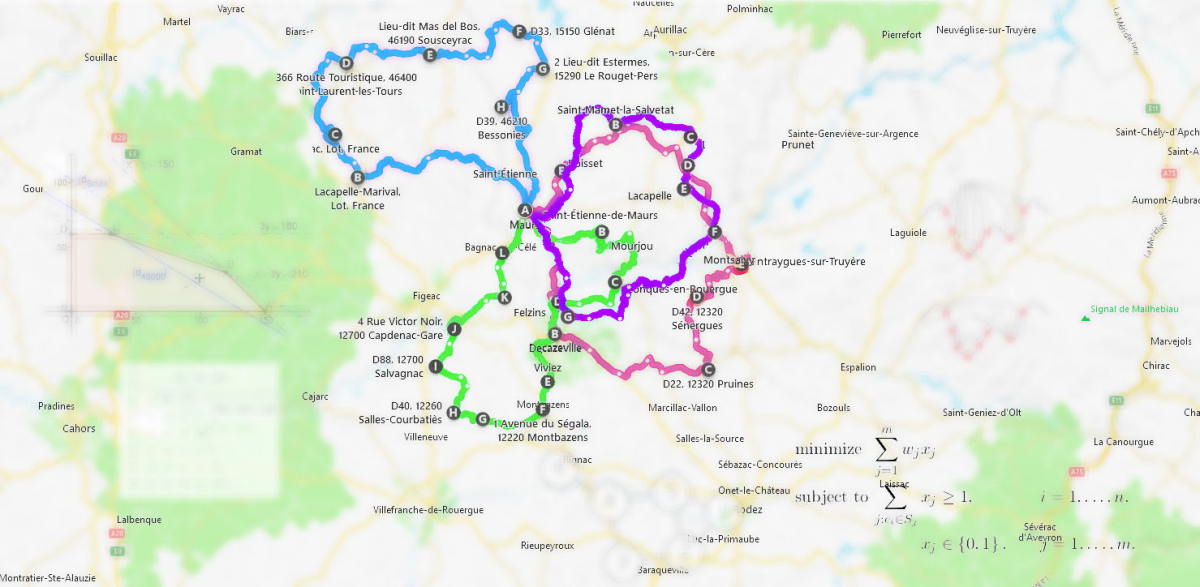

### PSO (Particle Swarm Optimization) pour le TSP (Traveling Salesman Problem)

In [ ]:
import numpy as np
import random

class Particle:
    def __init__(self, position):
        # Initialisation de chaque particule avec une position, une vitesse, la meilleure position connue et le meilleur score
        self.position = position
        self.velocity = np.zeros_like(position)  # Commencer avec une vitesse nulle
        self.best_position = position.copy()  # Enregistrer la position initiale comme la meilleure position connue
        self.best_score = float('inf')  # Initialiser le meilleur score à l'infini

def initialize_population(size, num_cities):
    # Initialisation de la population de particules
    population = []
    for _ in range(size):
        # Générer une position aléatoire (permutation des villes) pour chaque particule
        position = np.random.permutation(num_cities)
        population.append(Particle(position))
    return population

def calculate_route_cost(route, distances):
    # Calcul du coût d'une route pour une particule donnée
    cost = 0
    for i in range(len(route)):
        # Somme des distances entre les villes consécutives dans l'itinéraire
        cost += distances[route[i], route[(i + 1) % len(route)]]
    return cost

def update_velocity_and_position(particle, global_best_position, w=0.1, c1=0.5, c2=0.9):
    # Mise à jour de la vitesse et de la position de chaque particule
    r1, r2 = random.random(), random.random()
    # Composante cognitive : influence de la meilleure position personnelle de la particule
    cognitive_component = c1 * r1 * (particle.best_position - particle.position)
    # Composante sociale : influence de la meilleure position globale connue
    social_component = c2 * r2 * (global_best_position - particle.position)
    # Mise à jour de la vitesse et position basée sur les deux composantes et l'inertie
    particle.velocity = w * particle.velocity + cognitive_component + social_component
    particle.position = np.mod(particle.position + particle.velocity.astype(int), len(particle.position))

def pso(distances, num_iterations):
    # Algorithme principal PSO
    num_cities = distances.shape[0]
    population = initialize_population(30, num_cities)
    global_best_position = None
    global_best_score = float('inf')

    for _ in range(num_iterations):
        for particle in population:
            cost = calculate_route_cost(particle.position, distances)
            # Mise à jour du meilleur score personnel et global
            if cost < particle.best_score:
                particle.best_score = cost
                particle.best_position = particle.position.copy()
            if cost < global_best_score:
                global_best_score = cost
                global_best_position = particle.position.copy()
        # Mise à jour de la position de toutes les particules
        for particle in population:
            update_velocity_and_position(particle, global_best_position)

    # Convertir les indices des meilleures positions en noms des nœuds pour l'affichage
    best_route_indices = global_best_position
    best_route_names = [list(G.nodes)[i] for i in best_route_indices]
    return best_route_names, global_best_score

# Exécuter l'algorithme PSO et afficher les résultats
best_route, best_distance = pso(distances, 100)
print("Meilleure route:", best_route)
print("Distance minimale:", best_distance)

### Algorithme de Dijkstra pour les chemins les plus courts

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start_vertex, vehicle_capacities):
    # Initialisation des distances avec l'infini pour tous les sommets
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start_vertex] = 0  # La distance pour le sommet de départ est zéro

    # Utilisation d'une file de priorité
    priority_queue = [(0, start_vertex)]
    previous_nodes = {vertex: None for vertex in graph}  # Pour suivre les chemins

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        for neighbor in graph.neighbors(current_vertex):
            # Gérer la contrainte de capacité sur les arêtes, si nécessaire
            if 'capacity' in graph[current_vertex][neighbor] and graph[current_vertex][neighbor]['capacity'] < vehicle_capacities:
                continue
            
            distance = current_distance + graph[current_vertex][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous_nodes

# Sélection automatique d'un sommet de départ basé sur les nœuds disponibles dans le graphe
start_vertex = next(iter(G.nodes))  # Prend le premier nœud disponible dans le graphe

if 'num_vehicles' in G.graph and 'vehicle_capacities' in G.graph:
    num_vehicles = G.graph['num_vehicles']
    print(f"Nombre de véhicules utilisés: {num_vehicles}")
    vehicle_capacities = G.graph['vehicle_capacities'][0]  # Capacité du premier véhicule
    print("Capacités des véhicules:", G.graph['vehicle_capacities'])    
    distances_dijkstra, previous_nodes = dijkstra(G, start_vertex, vehicle_capacities)
    print("Distances from start:", distances_dijkstra)
else:
    print("Les données des véhicules ne sont pas disponibles.")


### Optimisation avec PuLP et le Solveur Simplex

In [ ]:
import pulp
import networkx as nx
import random

# Définition des données du problème
cities = list(G.nodes)
num_cities = len(cities)

# Récupération du nombre de véhicules et des capacités directement depuis les attributs du graphe
num_vehicles = G.graph['num_vehicles']
print(f"Nombre de véhicules utilisés: {num_vehicles}")
vehicle_capacities = G.graph['vehicle_capacities']  
print("Capacités des véhicules:", G.graph['vehicle_capacities'])

# Générer des demandes aléatoires pour chaque ville (le dépôt a une demande de 0)
demands = [0] + [random.randint(10, 40) for _ in range(num_cities - 1)]

# Création du modèle de problème
model = pulp.LpProblem("VRP", pulp.LpMinimize)

# Variables de décision
x = pulp.LpVariable.dicts('x', ((i, j, k) for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles)), cat='Binary')
u = pulp.LpVariable.dicts('u', (i for i in range(num_cities)), lowBound=0, cat='Continuous')

# Fonction objectif: minimiser la distance totale parcourue
distances = nx.floyd_warshall_numpy(G)  # Calcul des distances entre chaque paire de villes
model += pulp.lpSum(distances[i][j] * x[(i, j, k)] for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles))

# Contraintes
# Chaque ville doit être visitée par exactement un véhicule
for j in range(1, num_cities):
    model += pulp.lpSum(x[(i, j, k)] for i in range(num_cities) for k in range(num_vehicles)) == 1

# Chaque véhicule doit commencer et terminer au dépôt
for k in range(num_vehicles):
    model += pulp.lpSum(x[(0, j, k)] for j in range(1, num_cities)) == 1
    model += pulp.lpSum(x[(i, 0, k)] for i in range(1, num_cities)) == 1

# Continuité des routes pour chaque véhicule
for i in range(1, num_cities):
    for k in range(num_vehicles):
        model += pulp.lpSum(x[(i, j, k)] for j in range(num_cities)) - pulp.lpSum(x[(j, i, k)] for j in range(num_cities)) == 0

# Respect de la capacité de chaque véhicule
for i in range(1, num_cities):
    u[i].upBound = vehicle_capacities[k] 
    model += u[i] >= demands[i]
    model += u[i] <= vehicle_capacities[k]  
# Résolution du problème
model.solve()

# Vérification du statut de la solution
print("Statut de la solution:", pulp.LpStatus[model.status])

# Extraction et affichage des routes pour chaque véhicule
pulp_routes = []
if pulp.LpStatus[model.status] == 'Optimal':
    for k in range(num_vehicles):
        route = []
        for i in range(num_cities):
            for j in range(num_cities):
                if pulp.value(x[(i, j, k)]) == 1:
                    route.append((cities[i], cities[j]))
        pulp_routes.append(route)
    print("Routes trouvées par PuLP :", pulp_routes)
else:
    print("Pas de solution optimale trouvée")


## IV. Tests et Validation
Dans cette section, nous effectuons des tests pour valider les performances et l'efficacité des algorithmes implémentés. Nous évaluons les résultats obtenus à partir des algorithmes PSO et Dijkstra dans différents contextes de graphe.

### Tests de l'algorithme PSO (Particle Swarm Optimization)
Nous allons effectuer plusieurs tests en variant le nombre de villes et en observant les distances minimales obtenues pour chaque configuration.

In [ ]:
def test_pso(num_tests, num_iterations):
    for i in range(num_tests):
        best_route, best_distance = pso(distances, num_iterations)
        print(f"Test {i + 1}: Meilleure route: {best_route}, Distance minimale: {best_distance}")

# Exécuter les tests PSO
test_pso(num_tests=3, num_iterations=100)


### Tests de l'algorithme de Dijkstra
Nous allons vérifier l'algorithme de Dijkstra en générant des graphes aléatoires de différentes tailles et en calculant les distances à partir d'un sommet de départ donné.

In [ ]:

def test_dijkstra(num_tests, start_vertex):
    for i in range(num_tests):
        distances_dijkstra, previous_nodes = dijkstra(G, start_vertex)
        print(f"Test {i + 1}: Distances depuis le sommet {start_vertex}: {distances_dijkstra}")

# Exécuter les tests Dijkstra
test_dijkstra(num_tests=3, start_vertex=1)


### Tests de l'algorithme avec PuLP et le Solveur Simplex

Nous allons effectuer plusieurs tests en variant les distances et les demandes pour valider l'efficacité de l'optimisation avec PuLP et le solveur Simplex.

In [ ]:
import pulp
import random

def test_vrp(graph, num_tests, num_vehicles, vehicle_capacities, demands_range=(10, 40)):
    cities = list(graph.nodes)
    num_cities = len(cities)
    
    results = []
    
    for _ in range(num_tests):
        # Générer des demandes aléatoires pour chaque ville
        demands = [0] + [random.randint(*demands_range) for _ in range(num_cities - 1)]
        
        # Créer le modèle
        model = pulp.LpProblem("VRP_Test", pulp.LpMinimize)
        x = pulp.LpVariable.dicts('x', ((i, j, k) for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles)), cat='Binary')
        u = pulp.LpVariable.dicts('u', (i for i in range(num_cities)), lowBound=0, upBound=vehicle_capacities, cat='Continuous')

        # Distance matrix placeholder (update accordingly)
        distances = nx.floyd_warshall_numpy(graph)
        
        # Fonction objectif
        model += pulp.lpSum(distances[i][j] * x[(i, j, k)] for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles))

        # Ajouter les contraintes
        for j in range(1, num_cities):
            model += pulp.lpSum(x[(i, j, k)] for i in range(num_cities) for k in range(num_vehicles)) == 1
        
        for k in range(num_vehicles):
            model += pulp.lpSum(x[(0, j, k)] for j in range(1, num_cities)) == 1
            model += pulp.lpSum(x[(i, 0, k)] for i in range(1, num_cities)) == 1

        for i in range(1, num_cities):
            model += pulp.lpSum(x[(i, j, k)] for j in range(num_cities) for k in range(num_vehicles)) - pulp.lpSum(x[(j, i, k)] for j in range(num_cities) for k in range(num_vehicles)) == 0
            model += u[i] >= demands[i]
            model += u[i] <= vehicle_capacities

        for i in range(1, num_cities):
            for j in range(1, num_cities):
                if i != j:
                    for k in range(num_vehicles):
                        model += u[i] - u[j] + vehicle_capacities * x[(i, j, k)] <= vehicle_capacities - demands[j]

        # Résoudre le problème
        model.solve()

        # Enregistrer les résultats
        if pulp.LpStatus[model.status] == 'Optimal':
            routes = []
            for k in range(num_vehicles):
                route = [(cities[i], cities[j]) for i in range(num_cities) for j in range(num_cities) if pulp.value(x[(i, j, k)]) == 1]
                routes.append(route)
            results.append(("Optimal", routes))
        else:
            results.append(("Not Optimal", None))
    
    return results

# Utiliser cette fonction pour tester le modèle VRP
test_results = test_vrp(G, num_tests=3, num_vehicles=2, vehicle_capacities=100)
for status, routes in test_results:
    print(status)
    if routes:
        for route in routes:
            print(route)

## V. Visualisation des Résultats

La visualisation des routes générées par les différents algorithmes permet de mieux comprendre la qualité des solutions et les différences entre les méthodes. Les graphiques montrent clairement les routes prises par les véhicules, facilitant ainsi l'analyse des résultats.

Les figures ci-dessous montrent les routes trouvées par les algorithmes Dijkstra, PSO et PuLP. Les lignes rouges représentent les chemins empruntés par les véhicules, et les nœuds représentent les villes.

### Visualisation de la meilleure route PSO


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_best_route_only(G, best_route_names):
    # Créer un sous-graphe avec uniquement la meilleure route
    H = nx.Graph()
    route_nodes = set(best_route_names)
    for i in range(len(best_route_names) - 1):
        if best_route_names[i] in route_nodes and best_route_names[i+1] in route_nodes:
            H.add_edge(best_route_names[i], best_route_names[i+1])

    # Utiliser un layout circulaire pour mieux visualiser le chemin
    pos = nx.circular_layout(H)  

    # Dessiner uniquement la meilleure route
    nx.draw(H, pos, with_labels=True, node_color='red', edge_color='darkred', node_size=500, width=2)
    plt.title("Visualisation Simplifiée de la Meilleure Route PSO")
    plt.show()

# Exécuter la visualisation simplifiée
visualize_best_route_only(G, best_route)


### Visualisation des chemins les plus courts par Dijkstra

In [ ]:
def visualize_shortest_paths(graph, start_vertex, previous_nodes):
    pos = nx.spring_layout(graph)  # Layout pour les nœuds
    plt.figure(figsize=(10, 8))

    # Dessiner le graphe
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos, edge_color='gray')

    # Dessiner les chemins les plus courts
    for target in graph.nodes:
        if target != start_vertex:
            path = []
            while target is not None:
                path.insert(0, target)
                target = previous_nodes[target]
            edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='red', width=2.0)

    plt.title(f"Chemins les plus courts depuis {start_vertex}")
    plt.show()

# Appel de la fonction de visualisation pour 'A'
visualize_shortest_paths(G, 1, previous_nodes)


### Visualisation pour l'Optimisation de PuLP et le Solveur Simplex

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_vrp_routes(graph, routes):
    node_positions = nx.spring_layout(graph, seed=42)  # Reproductible layout

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(graph, node_positions, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(graph, node_positions)
    nx.draw_networkx_edges(graph, node_positions, edge_color='gray', style='dashed')

    num_trucks = len(routes)  # Afficher toutes les routes générées
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_trucks))  # Obtenir une gamme de couleurs

    print(f"Visualisation pour {num_trucks} camions.")

    for idx, route in enumerate(routes):
        if route:  # S'assurer que la route n'est pas vide
            route_edges = [(route[i][0], route[i+1][0]) for i in range(len(route)-1)]
            nx.draw_networkx_edges(graph, node_positions, edgelist=route_edges, edge_color=colors[idx], width=4, alpha=0.9)

    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_trucks)]
    labels = [f'Camion {i+1}' for i in range(num_trucks)]
    plt.legend(handles, labels, loc='upper right', title="Légende des camions")

    plt.title("Visualisation des Routes VRP Optimisées")
    plt.show()

visualize_vrp_routes(G, pulp_routes)


## VI. Validation des Algorithmes
Nous avons testé trois algorithmes différents pour résoudre le problème de tournées de véhicules (VRP), chacun avec ses propres forces et faiblesses selon les cas d'utilisation.

#### PSO (Particle Swarm Optimization)
Le PSO est rapide pour trouver de bonnes solutions avec des paramètres bien ajustés, mais sa performance varie beaucoup avec la taille de la population et le nombre d'itérations. Cela nécessite un ajustement précis pour obtenir les meilleurs résultats.

#### Dijkstra
L'algorithme de Dijkstra, modifié pour tenir compte des fenêtres de temps, fonctionne bien pour les graphes de taille petite à moyenne. Cependant, sa performance baisse dans les graphes très denses ou très grands, ce qui peut limiter son utilité dans des situations complexes.

#### PuLP et le Solveur Simplex
PuLP et le Solveur Simplex trouvent des solutions optimales pour les petits et moyens problèmes. Ils sont très utiles pour vérifier la qualité des solutions obtenues par d'autres méthodes. Toutefois, ils peuvent requérir beaucoup de ressources informatiques pour les grands problèmes, ce qui pose des défis pour leur utilisation à grande échelle.

### Synthèse des Performances
L'analyse montre que les méthodes heuristiques comme le PSO sont utiles pour obtenir rapidement de bonnes solutions dans de grands scénarios, tandis que les méthodes exactes comme PuLP sont idéales pour confirmer la précision des solutions dans des cas plus petits. Cette combinaison offre un ensemble complet d'outils pour traiter le VRP efficacement selon différentes échelles et exigences.

## VII. Conclusion
Ce projet a évalué différentes stratégies pour optimiser les tournées de livraison en milieu urbain, un défi central pour l'amélioration de la logistique et la réduction de l'empreinte carbone. Nos expérimentations avec divers algorithmes montrent qu'il n'existe pas de solution unique répondant à tous les scénarios, chaque méthode ayant des points forts spécifiques selon les exigences du problème.

### Contributions Principales
- **Algorithme PSO** : Il s'est révélé rapide et efficace pour générer de bonnes solutions sur de grands ensembles de données, adapté pour les situations demandant rapidité et flexibilité.
- **Algorithme de Dijkstra** : Excellent pour calculer les itinéraires les plus courts, son efficacité diminue néanmoins avec l'augmentation de la taille du réseau.
- **PuLP et Solveur Simplex** : Ces outils sont parfaits pour obtenir des résultats précis dans des cas de taille réduite, permettant de valider les approximations fournies par des approches heuristiques.

### Perspectives Futures
Pour améliorer davantage notre approche, nous envisageons :
- D'optimiser les heuristiques existantes pour augmenter leur efficacité, surtout pour les problèmes à très grande échelle.
- De mettre en œuvre des techniques de calcul parallèle pour accélérer le traitement des données et des simulations.
- D'explorer de nouvelles contraintes et objectifs pour adapter nos modèles aux réalités variées de la logistique urbaine moderne.
